<a href="https://colab.research.google.com/github/av-dutta/Vaccine-Prediction/blob/main/Flu_Vaccine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement:**
Predict how likely it is that the people will take an H1N1 flu vaccine.

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')
df.head()

unique_id  h1n1_worry  ...  no_of_children  h1n1_vaccine
0          0         1.0  ...             0.0             0
1          1         3.0  ...             0.0             0
2          2         1.0  ...             0.0             0
3          3         1.0  ...             0.0             0
4          4         2.0  ...             0.0             0

[5 rows x 34 columns]

In [ ]:
df.drop('unique_id', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

### Missing value Inspection

Total  Percent
has_health_insur         12274    45.96
income_level              4423    16.56
dr_recc_h1n1_vacc         2160     8.09
dr_recc_seasonal_vacc     2160     8.09
housing_status            2042     7.65
employment                1463     5.48
marital_status            1408     5.27
qualification             1407     5.27
chronic_medic_condition    971     3.64
cont_child_undr_6_mnths    820     3.07

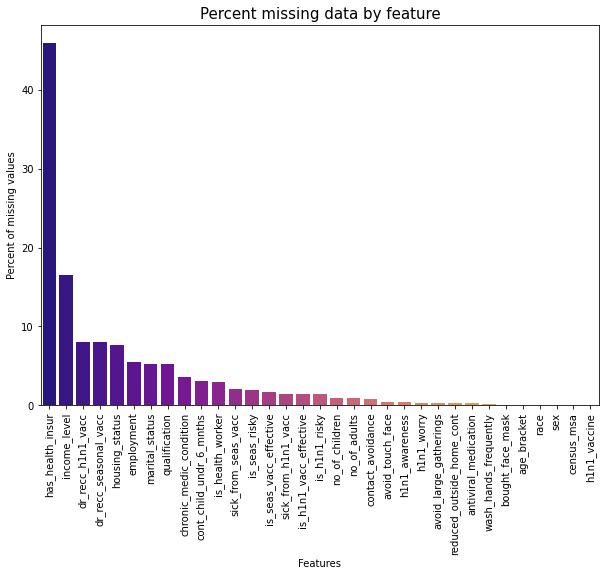

In [ ]:
Value_Missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending=False)
missing_data = pd.concat([Value_Missing, percent_missing], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize = (10, 7))
plt.xticks(rotation = '90')
sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette='plasma')
plt.xlabel('Features', fontsize = 10)
plt.ylabel('Percent of missing values', fontsize = 10)
plt.title('Percent missing data by feature', fontsize = 15)
missing_data.head(10)

#### The respondent received the h1n1 vaccine or not (1,0) - (Yes, No)

In [ ]:
x = df['h1n1_vaccine'].value_counts()
colors = ['#FEBFB3', '#E1396C']

trace = go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
layout = go.Layout(title = "Taking vs not taking H1N1 flu vaccine",width=500,height=500)
fig = go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

### 21.2% of the respondents have taken the vaccine.

### It is observed that 45.96% missing values is present in health insurance column (Does respondent have health insurance-(0,1))

In [ ]:
x = df['has_health_insur'].value_counts()
colors = ['#BF3EFF','#68228B']

trace = go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
layout = go.Layout(title = "Have vs does not have Health Insurance",width=500,height=500)
fig = go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

### It is a good thing that 88% respondents have health insurance.

In [ ]:
print(df[df['has_health_insur'].isnull()][['has_health_insur','h1n1_vaccine']])

       has_health_insur  h1n1_vaccine
2                   NaN             0
3                   NaN             0
4                   NaN             0
5                   NaN             0
6                   NaN             0
...                 ...           ...
26695               NaN             0
26698               NaN             0
26700               NaN             0
26702               NaN             0
26704               NaN             0

[12274 rows x 2 columns]


### Where the 'has_health_insur' value is missing, the respondent corresponding to that unique-id has not taken the h1n1 vaccine. 

### Investigating the 'Object' type variables present in the dataset

In [ ]:
df['h1n1_vaccine'] = df['h1n1_vaccine'].map({0:'Vaccinated', 1:'Not Vaccinated'})

In [ ]:
import plotly.express as px

In [ ]:
df1 = df.select_dtypes([np.object])

for i, col in enumerate(df1.columns):
  fig = px.histogram(df1, 
                     x = col, 
                     color = 'h1n1_vaccine',
                     width=750,   # plot width
                     height=500,  # plot height 
                     template="simple_white")
  fig.show()

In [ ]:
df['h1n1_vaccine'] = df['h1n1_vaccine'].map({'Vaccinated':0, 'Not Vaccinated':1})

In [ ]:
x_ind = df.drop('h1n1_vaccine', axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### Label encoding the 'Object' type variables

In [ ]:
for i in x_ind:
    x_ind[i] = le.fit_transform(x_ind[i].astype(str).values)

In [ ]:
x_ind.head()

h1n1_worry  h1n1_awareness  ...  no_of_adults  no_of_children
0           1               0  ...             0               0
1           3               2  ...             0               0
2           1               1  ...             2               0
3           1               1  ...             0               0
4           2               1  ...             1               0

[5 rows x 32 columns]

In [ ]:
y_dep = df['h1n1_vaccine']

### Missing value imputation using KNNImputer

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
x_ind = imputer.fit_transform(x_ind)

### Splitting the data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x_ind, y_dep , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(21365, 32)
(5342, 32)


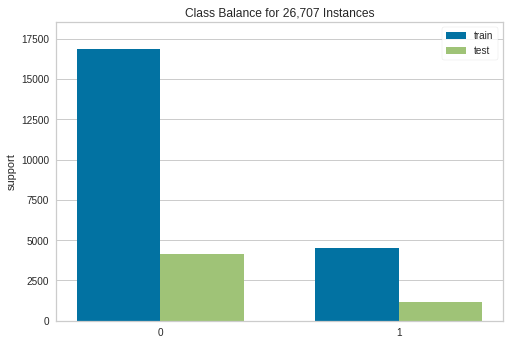

In [ ]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels = [0, 1])
visualizer.fit(y_train, y_test)
visualizer.poof();

### Fitting the LogisticRegression on Train data

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
clf.coef_

array([[ 0.04068402,  0.34232549,  0.30740547, -0.03080117,  0.22917444,
         0.15988485, -0.17098784, -0.0263483 ,  0.09623185,  1.44682943,
        -1.0157567 ,  0.07001521, -0.18959814,  0.5082959 , -1.05246175,
         0.52269586,  0.38560245, -0.03497463,  0.06619884,  0.18477511,
        -0.15771337,  0.13570054,  0.03417068,  0.08227548,  0.10942928,
         0.03853837, -0.30583578, -0.0694047 , -0.05633726,  0.04066059,
        -0.08427847, -0.02701652]])

In [ ]:
clf.intercept_

array([-3.81538349])

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8284577580154459
The accuracy on test data is  0.814301759640584


[[4070  102]
 [ 775  395]]


[Text(0, 0.5, 'Not Vaccinated'), Text(0, 1.5, 'Vaccinated')]

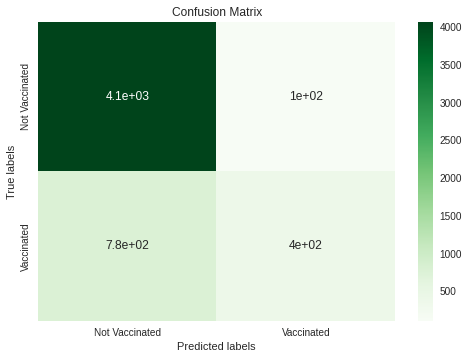

In [ ]:
labels = ['Not Vaccinated', 'Vaccinated']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap = 'Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4172
           1       0.64      0.36      0.46      1170

    accuracy                           0.81      5342
   macro avg       0.74      0.65      0.67      5342
weighted avg       0.79      0.81      0.79      5342



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
logit_roc_auc = roc_auc_score(y_test, test_class_preds)
print(logit_roc_auc)

0.6495617916758857


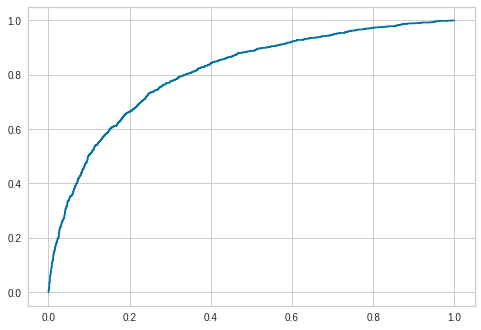

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, logit_roc_auc);

In [ ]:
roc_t = LogisticRegression(class_weight = 'balanced')
roc_t.fit(X_train, y_train)
threshold = 0.65
y_pred_roc = np.where(roc_t.predict_proba(X_test)[:,1] > threshold, 1, 0)
accuracy_score(y_test, y_pred_roc)

0.8038187944590042

### Even after setting the threshould value as 0.65 the model score does not improve. 

### Fitting RandomForestClassifier on Train data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator = rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose = 2, scoring = 'roc_auc')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8496138544348233
The accuracy on test dataset is 0.8358292774241857


[[4070  102]
 [ 775  395]]


[Text(0, 0.5, 'Not Vaccinated'), Text(0, 1.5, 'Vaccinated')]

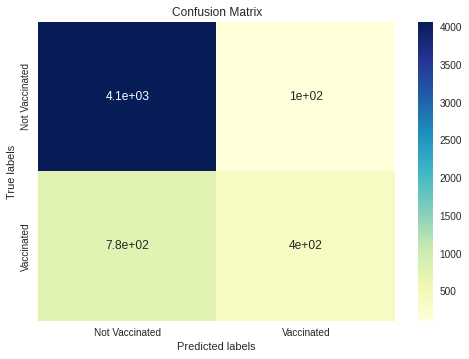

In [ ]:
labels = ['Not Vaccinated', 'Vaccinated']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap = 'YlGnBu'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      4172
           1       0.79      0.34      0.47      1170

    accuracy                           0.84      5342
   macro avg       0.82      0.66      0.69      5342
weighted avg       0.83      0.84      0.81      5342



### It can be said that RandomForestClassifier generates a better result over LogisticRegression.
- Precision and recall have improved for Class - 0 but for Class - 1 recall is not satisfactory.
- Accuracy score is 84%.
- Model can be improved by feature selection.